Q-1. What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?

he key idea is to combine multiple weak learners to create a strong model that outperforms individual models.
Example: A Voting Classifier combines Logistic Regression, SVM, and Decision Trees to improve accuracy.

 Bagging (Bootstrap Aggregating) trains models in parallel on random data subsets to reduce variance and prevent overfitting. Boosting, on the other hand, builds models sequentially, where each new model focuses on correcting the errors of the previous ones, thereby reducing bias. Bagging emphasizes independence among models, while boosting emphasizes learning from mistakes. Both methods enhance model performance but differ in strategy and the type of error they aim to minimize.


Q-2. Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.


Random Forest Classifier reduces overfitting by combining multiple decision trees trained on different subsets of the data, using a technique called bagging. Unlike a single decision tree, which can easily memorize training data and overfit, Random Forest introduces randomness in both data sampling and feature selection, leading to diverse trees whose averaged predictions generalize better.
Two key hyperparameters play a crucial role:
- n_estimators: This defines the number of trees in the forest. More trees generally improve performance and stability, reducing variance without increasing bias.
- max_features: This controls the number of features considered when splitting a node. By limiting feature choices, it ensures trees are less correlated, enhancing diversity and reducing overfitting.
Together, these mechanisms ensure that Random Forest maintains high accuracy while being robust to noise and overfitting, making it a powerful tool for classification tasks.


Q3-. What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.

Stacking is an ensemble learning technique that combines multiple models using a meta-model to improve prediction accuracy. Unlike bagging and boosting, stacking blends diverse models and learns how to best combine their outputs.
Stacking (or stacked generalization) involves training multiple base models (e.g., decision trees, SVMs, neural networks) on the same dataset and then using a meta-model to learn how to best combine their predictions. The meta-model is trained on the outputs (predictions) of the base models, not the original data.
This layered approach allows stacking to capture complex relationships between model outputs, often outperforming individual models or traditional ensembles.

Stacking combines predictions from multiple diverse models using a meta-model that learns the best way to blend them. Unlike bagging, which averages predictions to reduce variance, and boosting, which sequentially corrects errors to reduce bias, stacking focuses on learning optimal combinations. It leverages model diversity and layered learning for improved accuracy and generalization.

Example
Imagine a loan default prediction system:
- Base models: Logistic Regression, Random Forest, and Gradient Boosting.
- Meta-model: A simple Linear Regression model that learns which base model to trust more for different types of borrowers.
This setup allows the system to leverage the strengths of each model—e.g., Random Forest for non-linear patterns, Logistic Regression for interpretability—and combine them intelligently for better overall predictions.
If you'd like, I can walk you through how to implement stacking using scikit-learn or compare its performance with boosting on a sample dataset.





Q-4. What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?

The Out-of-Bag (OOB) Score in Random Forest is an internal validation metric that estimates model performance using data not seen by individual trees during training. When building each tree, Random Forest uses a bootstrap sample—randomly selecting data points with replacement. On average, about one-third of the training data is left out of each tree’s sample. These unused data points are called Out-of-Bag samples.
The OOB score is calculated by aggregating predictions for each data point using only the trees that did not train on it. This provides an unbiased estimate of model accuracy, similar to cross-validation.
It is useful
- It eliminates the need for a separate validation set, allowing all data to be used for training.
- It offers a quick, built-in way to evaluate model generalization.
- It helps detect overfitting early during training.
Thus, the OOB score is a powerful and efficient tool for model evaluation in Random Forests.


Q-5. Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases

AdaBoost handles errors by increasing the weights of misclassified samples, forcing subsequent weak learners to focus on harder cases. It adjusts sample weights after each iteration based on the learner’s accuracy, giving more influence to better-performing models.

Gradient Boosting, instead, fits new models to the residual errors of previous ones. It uses gradient descent to minimize a loss function, adjusting predictions rather than sample weights.

Typical use cases:
- AdaBoost: Binary classification tasks like spam detection or face recognition, where interpretability and simplicity are valued.
- Gradient Boosting: Complex regression and classification problems, such as credit scoring, sales forecasting, and ranking systems, where high accuracy is crucial.
Gradient Boosting is generally more flexible and powerful, especially with regularization techniques.



Q-6. :Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables

CatBoost performs well on categorical features because it uses advanced encoding techniques internally, eliminating the need for manual preprocessing like one-hot or label encoding. It transforms categorical data into numerical values using target statistics and combinations.
CatBoost, developed by Yandex, is a gradient boosting algorithm specifically designed to handle categorical variables efficiently. Unlike traditional models that require extensive preprocessing, CatBoost automatically detects categorical features and applies a technique called ordered target statistics. This method replaces categories with numerical values based on the target variable, while avoiding target leakage by using only past data during training.
Additionally, CatBoost generates combinations of categorical features to capture complex interactions, further enhancing model performance. It also uses one-hot encoding selectively for features with few unique values, optimizing both speed and accuracy.
This built-in handling makes CatBoost ideal for datasets rich in categorical data, saving time and reducing the risk of preprocessing errors.


In [1]:
"""Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions"""

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the Wine dataset
data = load_wine()
X, y = data.data, data.target

# 2. Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train KNN (K=5) without scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("=== Without Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 4. Apply StandardScaler, retrain KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\n=== With Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Classification Report:\n", classification_report(y_test, y_pred_scaled))

# 5. GridSearchCV to find best K and distance metric
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("\n=== GridSearchCV Results ===")
print("Best Parameters:", grid.best_params_)

# 6. Train optimized KNN and compare
best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

print("\n=== Optimized KNN ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


=== Without Scaling ===
Accuracy: 0.7407407407407407
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54


=== With Scaling ===
Accuracy: 0.9629629629629629
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54


=== GridSearchCV Results ===
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 

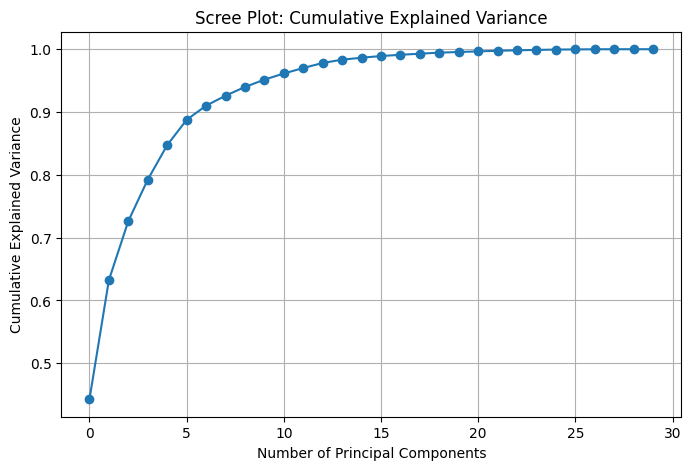

Accuracy on original data: 0.9591
Accuracy on PCA-transformed data: 0.9649


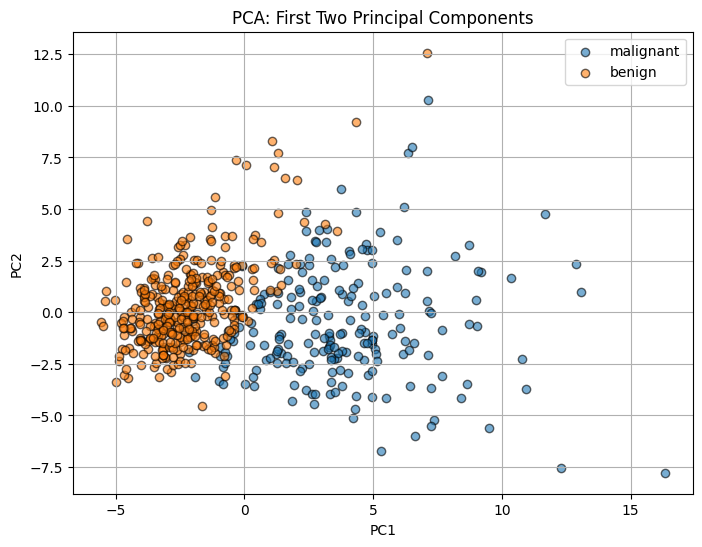

In [2]:
"""Question 8 - PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class)."""

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply PCA and plot the scree plot
pca_full = PCA()
pca_full.fit(X_scaled)
explained_variance = pca_full.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title('Scree Plot: Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# 3. Retain 95% variance and transform the dataset
pca_95 = PCA(n_components=0.95)
X_pca = pca_95.fit_transform(X_scaled)

# 4. Train KNN on original and PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_pca_train, X_pca_test = train_test_split(X_pca, test_size=0.3, random_state=42)

knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca_train, y_train)
y_pred_pca = knn_pca.predict(X_pca_test)
acc_pca = accuracy_score(y_test, y_pred_pca)

print(f"Accuracy on original data: {acc_original:.4f}")
print(f"Accuracy on PCA-transformed data: {acc_pca:.4f}")

# 5. Visualize the first two principal components
plt.figure(figsize=(8, 6))
colors = ['red', 'blue']
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1],
                label=data.target_names[label], alpha=0.6, edgecolors='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: First Two Principal Components')
plt.legend()
plt.grid(True)
plt.show()



MSE (Euclidean, K=5): 4803.91
MSE (Manhattan, K=5): 5210.23


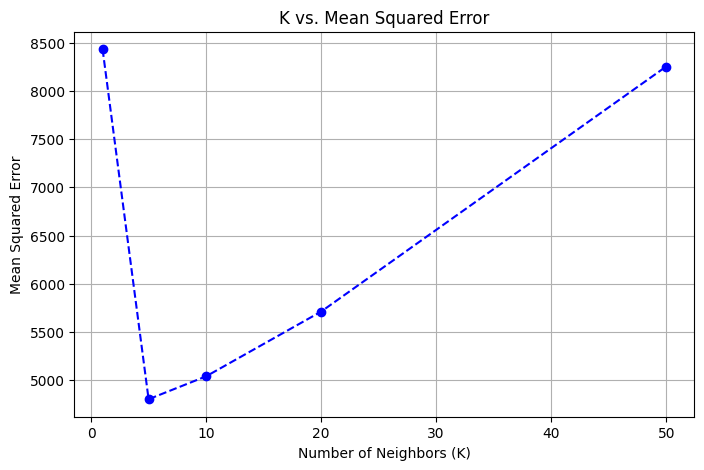

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 1. Generate synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2a. Train KNN regressor with Euclidean distance (K=5)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# 2b. Train KNN regressor with Manhattan distance (K=5)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print(f"MSE (Euclidean, K=5): {mse_euclidean:.2f}")
print(f"MSE (Manhattan, K=5): {mse_manhattan:.2f}")

# 3. Test K values and plot K vs. MSE
k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plotting K vs. MSE
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_values, marker='o', linestyle='--', color='blue')
plt.title('K vs. Mean Squared Error')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

=== KNN Algorithm Comparison ===
BRUTE: Accuracy = 0.6753, Training Time = 0.0054 seconds
KD_TREE: Accuracy = 0.6753, Training Time = 0.0042 seconds
BALL_TREE: Accuracy = 0.6753, Training Time = 0.0071 seconds


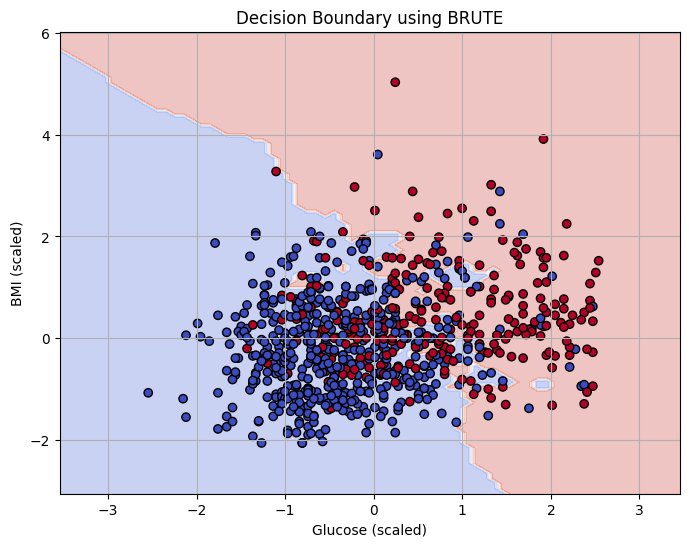

In [6]:
"""Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features)."""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# 1. Load the Pima Indians Diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
           'BMI','DiabetesPedigreeFunction','Age','Outcome']
df = pd.read_csv(url, header=None, names=columns)

# Replace zeroes in certain columns with NaN (indicating missing values)
missing_cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[missing_cols] = df[missing_cols].replace(0, np.nan)

# 2. Use KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=columns)

# Features and target
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 3. Train KNN with different algorithms
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = {}

for algo in algorithms:
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    knn.fit(X_train, y_train)
    duration = time.time() - start
    accuracy = accuracy_score(y_test, knn.predict(X_test))
    results[algo] = {'accuracy': accuracy, 'time': duration}

# 4. Compare training time and accuracy
print("=== KNN Algorithm Comparison ===")
for algo, metrics in results.items():
    print(f"{algo.upper()}: Accuracy = {metrics['accuracy']:.4f}, Training Time = {metrics['time']:.4f} seconds")

# 5. Plot decision boundary using 2 most important features (e.g., Glucose and BMI)
# Reduce to 2 features for visualization
X_vis = df_imputed[['Glucose', 'BMI']]
X_vis_scaled = scaler.fit_transform(X_vis)
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis_scaled, y, test_size=0.3, random_state=42)

# Use best-performing algorithm
best_algo = max(results, key=lambda k: results[k]['accuracy'])
knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
knn_best.fit(X_train_vis, y_train_vis)

# Create mesh grid
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('Glucose (scaled)')
plt.ylabel('BMI (scaled)')
plt.title(f'Decision Boundary using {best_algo.upper()}')
plt.grid(True)
plt.show()